# **Data Preprocessing**

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '../data/1832_v4.xlsx'
JOB_PATH = "../data/classification_metiers.csv"

In [147]:
rec = pd.read_excel(
    DATA_PATH, 
    index_col=0,
    na_values=['·', 'ne', 'nee']
)
rec = rec[[
    "nom_rue_norm_2",
    "no_maison",
    "chef_annee_naissance",
    "chef_origine_norm_2",
    "chef_annee_arrivee",
    "chef_vocation_norm_2",
    "Page",
    'Division'
]]
rec = rec.rename(columns={
    "nom_rue_norm_2": "nom_rue",
    "chef_origine_norm_2": "chef_origine",
    "chef_vocation_norm_2": "chef_vocation",
    "Page" : "page",
    "Division" : "division"
})

print(f'Number of records: {len(rec)}')
rec.head()

Number of records: 3674


,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division
1,marterey,1,1764,tolochenaz,1786,charon,1,1-2
2,marterey,2,17936,rolle,1821,marechal-ferrant,1,1-2
3,marterey,3,1785,pailly,NaN,lingere,1,1-2
4,marterey,NaN,NaN,gingins,NaN,rentier,1,1-2
5,marterey,NaN,1802,lutry,NaN,garcon voiturier,1,1-2


## **Process House Number**

In [148]:
# Replace all values not numeric by NaN in no_maison
nans_before = rec['no_maison'].isna().sum().sum()
rec['no_maison'] = pd.to_numeric(rec['no_maison'], errors='coerce')
nans_after = rec['no_maison'].isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 23


In [149]:
# Set nan to house numbers that are not in the range [MAX_HOUSE_NUMBER, MIN_HOUSE_NUMBER]
MAX_HOUSE_NUMBER = 1
MIN_HOUSE_NUMBER = 100
nans_before = rec['no_maison'].isna().sum().sum()
rec.loc[rec['no_maison'] > MIN_HOUSE_NUMBER, 'no_maison'] = np.nan
rec.loc[rec['no_maison'] < MAX_HOUSE_NUMBER, 'no_maison'] = np.nan
nans_after = rec['no_maison'].isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 11


In [150]:
# Fill forward no_maison
rec['no_maison'] = rec['no_maison'].fillna(method='ffill')
rec['no_maison'] = rec['no_maison'].astype(int)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division
1,marterey,1,1764,tolochenaz,1786,charon,1,1-2
2,marterey,2,17936,rolle,1821,marechal-ferrant,1,1-2
3,marterey,3,1785,pailly,NaN,lingere,1,1-2
4,marterey,3,NaN,gingins,NaN,rentier,1,1-2
5,marterey,3,1802,lutry,NaN,garcon voiturier,1,1-2


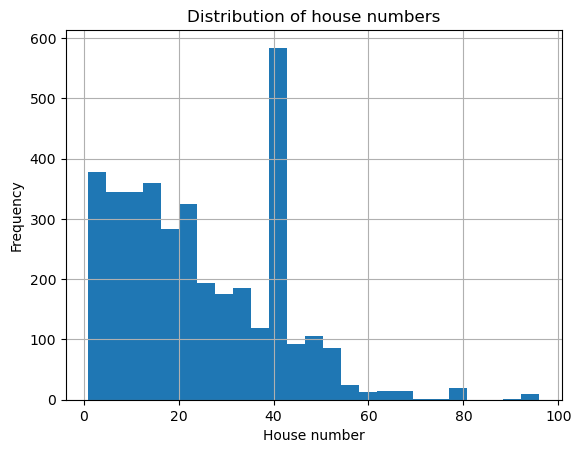

In [151]:
# Show the distribution of the house numbers
rec['no_maison'].hist(bins=25)
plt.title('Distribution of house numbers')
plt.xlabel('House number')
plt.ylabel('Frequency')
plt.show()

## **Process Birth Year**

In [152]:
# Replace all values not numeric by NaN in chef_annee_naissance
nans_before = rec.isna().sum().sum()
rec['chef_annee_naissance'] = pd.to_numeric(rec['chef_annee_naissance'], errors='coerce')
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 27


In [153]:
# Set nan to people that are more than 100 years old, and less than 10
YEAR = 1832
nans_before = rec.isna().sum().sum()
rec.loc[rec['chef_annee_naissance'] < YEAR - 100, 'chef_annee_naissance'] = np.nan
rec.loc[rec['chef_annee_naissance'] > YEAR - 10, 'chef_annee_naissance'] = np.nan
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 160


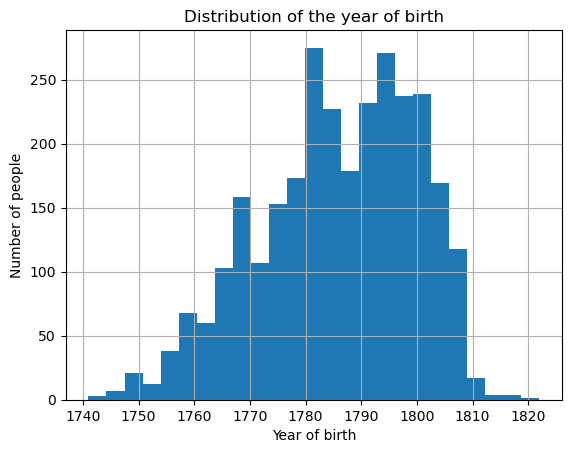

In [154]:
# Show the distribution of the year of birth
rec['chef_annee_naissance'].hist(bins=25)
plt.title('Distribution of the year of birth')
plt.xlabel('Year of birth')
plt.ylabel('Number of people')
plt.show()

## **Process Arrival Year**

In [155]:
# Replace all values not numeric by NaN in chef_annee_naissance
nans_before = rec.isna().sum().sum()
rec['chef_annee_arrivee'] = pd.to_numeric(rec['chef_annee_arrivee'], errors='coerce')
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 54


In [156]:
# Set nan to people that came more than 100 years before 1832, and after 1832
YEAR = 1832
nans_before = rec.isna().sum().sum()
rec.loc[rec['chef_annee_arrivee'] < YEAR - 100, 'chef_annee_arrivee'] = np.nan
rec.loc[rec['chef_annee_arrivee'] > YEAR, 'chef_annee_arrivee'] = np.nan
nans_after = rec.isna().sum().sum()
print(f'Number of new NaNs: {nans_after - nans_before}')

Number of new NaNs: 35


Text(0, 0.5, 'Number of people')

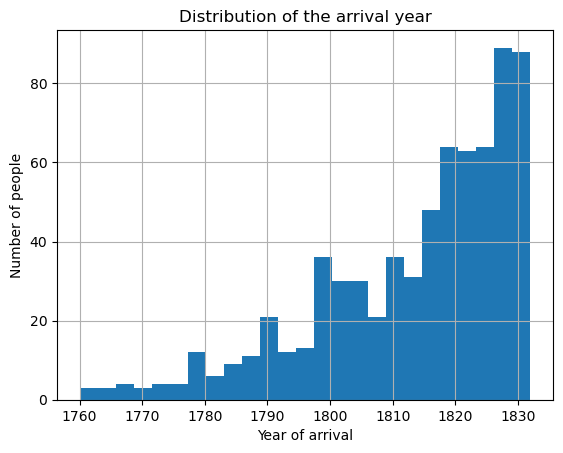

In [157]:
# Show the distribution of the arrival year
rec['chef_annee_arrivee'].hist(bins=25)
plt.title('Distribution of the arrival year')
plt.xlabel('Year of arrival')
plt.ylabel('Number of people')

## **Process Job**

In [158]:
job_classifications = pd.read_csv(JOB_PATH)
job_classifications.head() 

,job,class
0,rentier,rente
1,rentiere,rente
2,journalier,agricole
3,vigneron,agricole
4,proprietaire,rente


In [159]:
rec = rec.merge(job_classifications, left_on="chef_vocation", right_on="job", how="left")
rec = rec.drop(columns=["job"])
rec = rec.rename(columns={"class": "chef_vocation_class"})
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1-2,NaN
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1-2,artisanat
2,marterey,3,1785.0,pailly,NaN,lingere,1,1-2,service
3,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente
4,marterey,3,NaN,gingins,NaN,rentier,1,1-2,rente


In [160]:
rec.isna().sum()

nom_rue                    0
no_maison                  0
chef_annee_naissance     842
chef_origine             143
chef_annee_arrivee      3069
chef_vocation            300
page                       0
division                   0
chef_vocation_class      856
dtype: int64

In [161]:
rec[rec['chef_vocation_class'].isna()].value_counts('chef_vocation')

chef_vocation
sans vocation              28
?                          18
pintier                    15
locataire                   7
assistee                    5
                           ..
fabricant de cuir verni     1
fabricant de crin           1
fabricant de corsets        1
fabricant de chaud?         1
voyageur                    1
Length: 374, dtype: int64